[link=https://nptel.ac.in/courses/112/104/112104030]

<!-- '''
1. Consider a thick copper slab that is working as a wall of a nuclear reactor
(Figure 1). The slab is initially at a temperature of 35 o
C. As the reaction starts,
the slab is exposed to a heat flux of 3 X 10 5
 W/ m2
. use a strongly implicit
method (unlike Crank-Nicolson, all the terms of the spatial derivative are at
unknown time level) with a space increment of x = 25 mm, determine the
temperature distribution up to an interior point that is 150 mm away from the
surface after 25 seconds have elapsed. For copper, k = 401 W/ mK and  = 117
X 10 -6 m2
 /s. You need not solve the complete problem. Formulate the problem
by writing the algebraic equations and forming the Matrices. One of the boundary
conditions of the problem is given by the node next to the node at 150 mm, which
is assumed to remain at 35 o
C. The condition for this node is n n 1 T T i i
  . The
energy balance on a control volume on the surface node is obtained by
v
T dT c V k A qA t dx 
  
 
In the above equation, V is the volume, A is the area and q is incoming heat
flux (all in 2D). All other interior nodes can be calculated by using unsteady one
dimensional heat conduction equation as
2
2
T T
t x

    
For the compact ness of the equations, substitute F as grid Fourier number
2 ( )
t
x

        in the expressions. You may like to consider the nodal points at the
cell centre. 
''' -->

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
nx = 7
nt = 25
dx = .150 / nx
dt = numpy.linspace(0,25,25)
alpha = 117 * 10**-6
Tn = [35]*(nx)
T = [35]*nx
#F = alpha * dt / dx**2
q = 3 * 10**5
k = 401

In [3]:
def TDMA(T,F,n,dt):
    a = numpy.zeros(n)
    b = a.copy()
    c = a.copy()
    d = a.copy()
    a[0] = 0
    b[0] = 1 + 2*F
    c[0] = -2*F
    d[0] = 2 * alpha * q * dt/(k * dx) + (35+273)
    #....Initialization
    for i in range(1,n):
        a[i] = -F
        b[i] = 1 + 2*F
        c[i] = -F
        d[i] = T[i]
    c[n-1] = 0
    d[n-1] = T[n-2] + F * T[n-1]
    print('ai = ',a)
    print('bi = ',b)
    print('ci = ',c)
    print('di = ',d)
    
    c[0] = c[0]/b[0]
    print('C0', c[0])
    d[0] = d[0]/b[0]
    print('d0', d[0])
    
    #....Forward subsitution
    for i in range(1,n):
        c[i] = c[i] / (b[i] - a[i] * c[i-1])
        d[i] = (d[i] - a[i]*d[i-1]) / (b[i] - a[i] * c[i-1])
        print('c and d', c[i],d[i])
    #....Back Substitution
    u = [0]*n
    print('dN and un',d[n-1],u[n-1])
    u[n-1] = d[n-1]
    print('Un', u[n-1])
    i = n-2
    while i >= 0:
        u[i] = d[i] - u[i+1] * c[i]
        print('Un1', u[i])
        i-=1
    return u

ai =  [ 0. -0. -0. -0. -0. -0. -0.]
bi =  [1. 1. 1. 1. 1. 1. 1.]
ci =  [-0. -0. -0. -0. -0. -0.  0.]
di =  [308.  35.  35.  35.  35.  35.  35.]
C0 -0.0
d0 308.0
c and d -0.0 35.0
c and d -0.0 35.0
c and d -0.0 35.0
c and d -0.0 35.0
c and d -0.0 35.0
c and d 0.0 35.0
dN and un 35.0 0
Un 35.0
Un1 35.0
Un1 35.0
Un1 35.0
Un1 35.0
Un1 35.0
Un1 308.0
[308.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0]
ai =  [ 0.         -0.26541667 -0.26541667 -0.26541667 -0.26541667 -0.26541667
 -0.26541667]
bi =  [1.53083333 1.53083333 1.53083333 1.53083333 1.53083333 1.53083333
 1.53083333]
ci =  [-0.53083333 -0.26541667 -0.26541667 -0.26541667 -0.26541667 -0.26541667
  0.        ]
di =  [316.50997506  35.          35.          35.          35.
  35.          44.28958333]
C0 -0.34676102340773
d0 206.7566521909706
c and d -0.18447121710876352 62.46652605857486
c and d -0.1791090854714208 34.807102856653835
c and d -0.17893723299088415 29.82440530975928
c and d -0.17893173069570475 28.931925517819643
c and d -0.17

ai =  [ 0.         -4.24666667 -4.24666667 -4.24666667 -4.24666667 -4.24666667
 -4.24666667]
bi =  [9.49333333 9.49333333 9.49333333 9.49333333 9.49333333 9.49333333
 9.49333333]
ci =  [-8.49333333 -4.24666667 -4.24666667 -4.24666667 -4.24666667 -4.24666667
  0.        ]
di =  [444.159601    35.          35.          35.          35.
  35.         183.63333333]
C0 -0.8946629213483146
d0 46.786474824175514
c and d -0.7458145527437886 41.04085703235034
c and d -0.6712922037331664 33.08303541309016
c and d -0.6393099122385366 26.419350204756764
c and d -0.6265001174624887 21.715188513121706
c and d -0.6215122714552596 18.6186100234897
c and d 0.0 38.32816040880245
dN and un 38.32816040880245 0
Un 38.32816040880245
Un1 42.440032059866056
Un1 48.30387358373957
Un1 57.300495386358676
Un1 71.54841123600102
Un1 94.40270335785709
Un1 131.2450731934943
[131.2450731934943, 94.40270335785709, 71.54841123600102, 57.300495386358676, 48.30387358373957, 42.440032059866056, 38.32816040880245]
ai =  [ 0

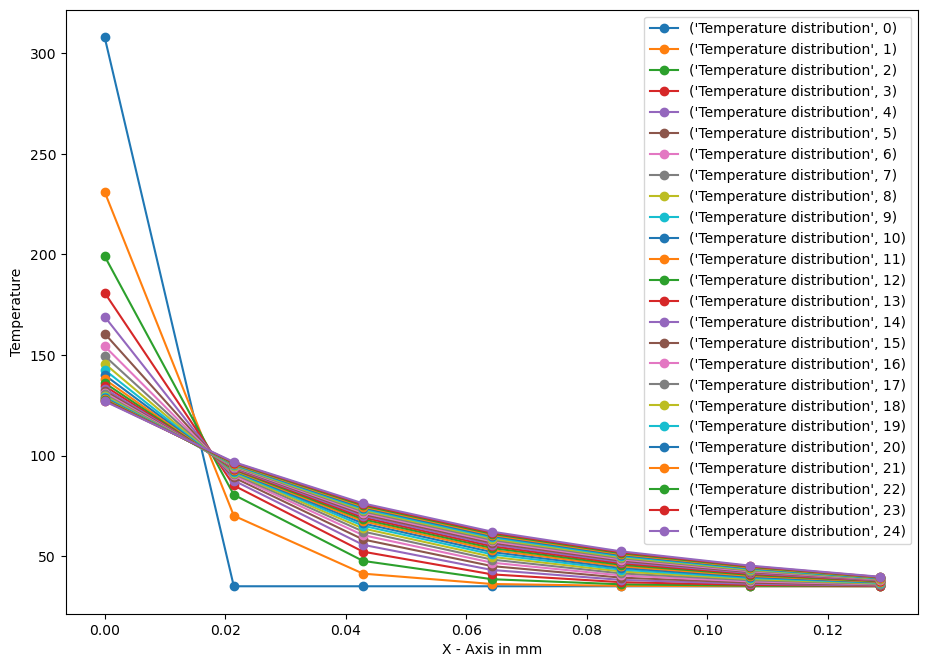

In [5]:
x = numpy.arange(0, .150, dx)
pyplot.figure(figsize = (11,8), dpi = 100)
for i in range(nt):
    F = alpha * dt[i] / dx**2
    Tn = TDMA(T,F,nx,dt[i])
    print(Tn)
    pyplot.plot(x, Tn, marker='o', label = ('Temperature distribution',i))
    pyplot.ylabel('Temperature')
    pyplot.xlabel('X - Axis in mm')
    pyplot.legend()
print(T)